In [1]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset, random_split

from models import *
from utils import *
from train import train
from dataset import customMNIST

##### Data

In [2]:
batch_size = 128

In [3]:
train_subset, val_subset = random_split(customMNIST(), [50000, 10000])
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True, drop_last=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=True, drop_last=True)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 11603473.93it/s]


Extracting ./data/customMNIST/raw/train-images-idx3-ubyte.gz to ./data/customMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 33196956.38it/s]


Extracting ./data/customMNIST/raw/train-labels-idx1-ubyte.gz to ./data/customMNIST/raw



100%|██████████████████████████████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 11617645.45it/s]


Extracting ./data/customMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/customMNIST/raw



100%|████████████████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 12049670.31it/s]


Extracting ./data/customMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/customMNIST/raw



In [4]:
test_set = customMNIST(train=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, drop_last=True)

Shift every image in the training set to see the effect on the accuracy

In [5]:
shifted_set = customMNIST(hshift=-2)
shifted_loader = DataLoader(shifted_set, batch_size=batch_size, shuffle=True, drop_last=True)

##### MLP

In [6]:
model = MLP(28*28, [512, 256, 128, 64, 32, 16, 10])
print(model.n_params)

577178


In [7]:
train_loss, reg_loss, train_acc, val_loss, val_acc = train(
    model,
    optim.Adam,
    nn.CrossEntropyLoss(),
    10,
    1e-3,
    train_loader, 
    val_loader,
    reg_str = 1e-1,
    reg_ord = 1
)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

In [46]:
torch.save(model.state_dict(), 'mlp.pt')

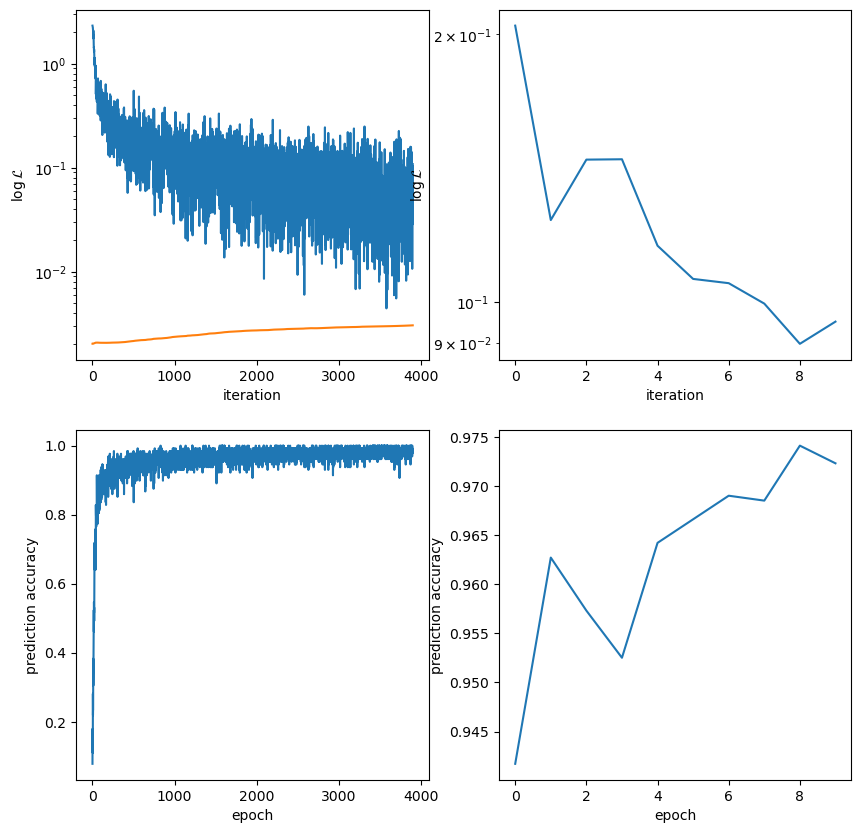

In [8]:
_, _ = plot_losses(train_loss, reg_loss, val_loss, train_acc, val_acc)

In [9]:
calc_accuracy(model, test_loader)

tensor(0.9756)

In [10]:
calc_accuracy(model, shifted_loader)

tensor(0.8264)

##### CNN

In [11]:
cnnmodel = CNN([1, 8, 64, 128], 3, 0, (128,10))
print(cnnmodel.n_params)

79898


In [12]:
train_loss, reg_loss, train_acc, val_loss, val_acc = train(
    cnnmodel,
    optim.Adam,
    nn.CrossEntropyLoss(),
    10,
    1e-3,
    train_loader, 
    val_loader,
    reg_str = 1e-1,
    reg_ord = 2
)

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/390 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

In [47]:
torch.save(cnnmodel.state_dict(), 'cnn.pt')

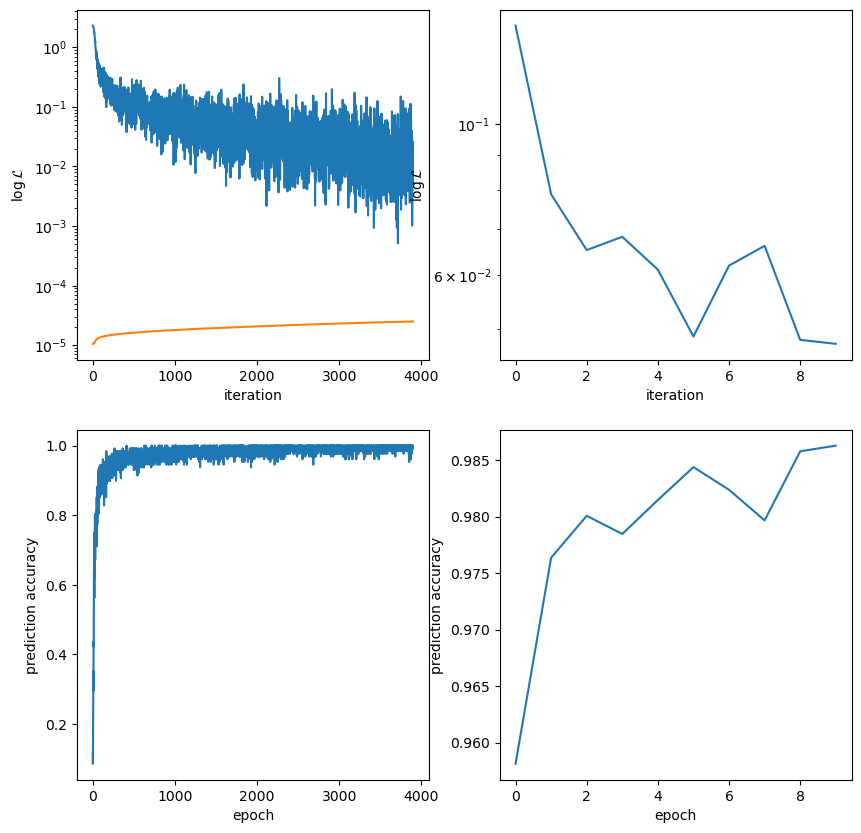

In [13]:
_, _ = plot_losses(train_loss, reg_loss, val_loss, train_acc, val_acc)

In [14]:
calc_accuracy(cnnmodel, test_loader)

tensor(0.9842)

In [16]:
calc_accuracy(cnnmodel, shifted_loader)

tensor(0.9406)